### **Student's performance in Exam using Simple Linear Regression**

Simple linear regression is a statistical method to find relationship between two continuous variables. Out of two variables, one is dependent variable and the other is independent variable.

The relationship between independent and dependent variable is defined by a line equation,

```
Y = b0 + b1 (X)

where,
Y is dependent variable
X is independent variable
b0 is intercept value of the relationship
b1 is the slope line explaining the relationship between Y and X
```


For instance, Y refers to how the scores of a student change with the number of hours they studied or prepared for exam. So in this case, scores would be dependent and number of hours would be independent.

**Step 1 - Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

**Step 2 - Importing the dataset**

In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step 3 - Visualizing the data**

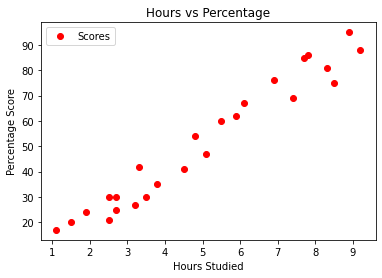

In [3]:
data.plot(x='Hours', y='Scores', c='red', style='o')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

So by visualising the data, we can say that Simple linear regression will tell us what is the best fitting line for this relationship.

**Step 4 - Performing data preprocessing**

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Splitting dataset is essential for an unbiased evaluation of prediction performance.

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Step 5 - Fit the dataset into Simple linear regression model**

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
line = (regressor.coef_*X)+regressor.intercept_

**Step 6 - Visualising the correlation in the dataset**

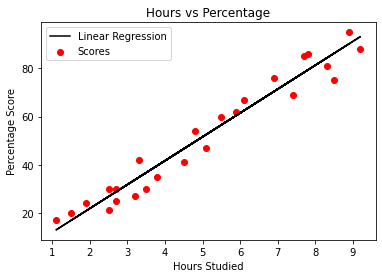

In [8]:
plt.scatter(X, y, c='red', label='Scores')
plt.plot(X, line, c='black', label='Linear Regression')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

In [9]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


The Mean Absolute Error value is 4.184, which shows that, 

```
Predicted value = Actual value + MAE (or) Actual value - MAE 
```
From the above dataframe, the actual value is 20 but the predicted value is 16.88 (20 - 3.12)

Error between predicted and actual value is less.

In [17]:
print('Coefficient of determination:', metrics.r2_score(y_test,y_pred))

Coefficient of determination: 0.9454906892105354


**Step 7 - Predicting the value for dependent variable (Scores)**

Now predict the score of a student who studies for 9.25 hours.

In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


So if the student studies for 9.25 hours then the predicted value for score is 93.69 (using Simple linear regression).